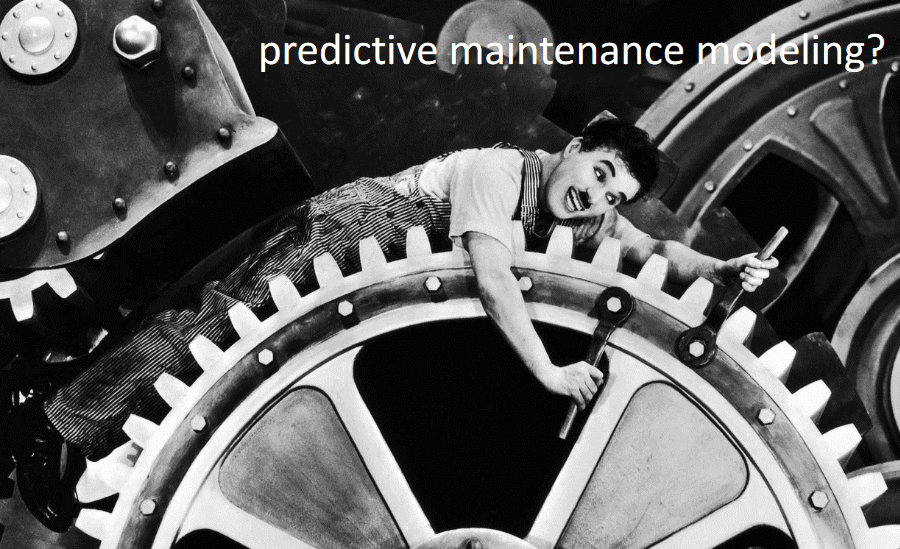

How to predict failure of equipment without having data of failure because it has never been recorded?
There is a way to predict failure if we explore data of machinery in good running condition. With Fast Fourier Transform!

One of the most promising applications of an FFT for equipment condition-monitoring is analysis of the vibration from accelerometers placed on rotating machinery. 

Features which may be hidden or invisible in the time-domain may be easier to assess in the frequency-domain. Converting time-domain data into the frequency-domain is also a commonly-used exploratory technique to reveal any repeating patterns.

If the rotating machinery contains ball bearings, the balls within the bearings will pass the accelerometer at a specified frequency (depending on the number of balls and the bearing geometry) which will show up as a peak in the frequency spectrum. 

The magnitude of the peak is often used to diagnose faults within the bearings, with high magnitudes indicating an impending failure.

Please have a look at Fast Fourier Transform Example Explained.ipynb to examine the code steps in more detail.

# At first lets have a look at a simple signal

dt=0.01259s (Sample Time)
fa=79.42Hz (Sample Frequency)
Nyquist=39.71Hz:


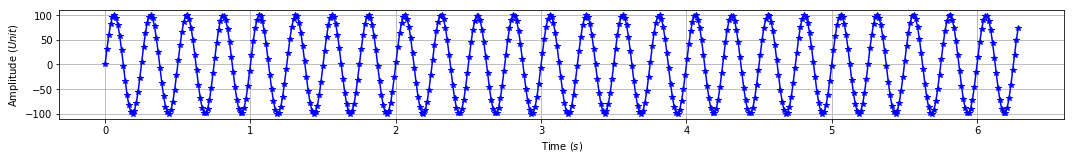

Y.size: 500
N: 251


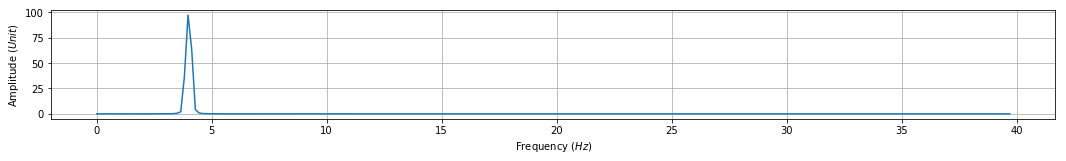

Show me the highest frequency peaks:
   peak   Hz
0  97.3  4.0
1  63.5  4.1
2  36.6  3.8


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Number_samples = 500
t = np.linspace(0, 2.0*np.pi, Number_samples, endpoint=True)
f = 4.0 # Frequency in Hz
A = 100.0 # Amplitude in Unit
s = A * np.sin(2*np.pi*f*t) # Signal

dt = t[1] - t[0] # We know now that dt is constant but in practice sampling might be not.
fa = 1.0/dt # Sampling rate
print('dt=%.5fs (Sample Time)' % dt)
print('fa=%.2fHz (Sample Frequency)' % fa)
Nyquist = fa/2
print('Nyquist=%.2fHz:' % Nyquist)

#Plotting Time Domain
fig, ax = plt.subplots(figsize=(18,2))
plt.plot(t,s,'b*-')
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

Y = np.fft.fft(s)
N = int(Y.size/2+1) #Make it an Integer
print('Y.size:',Y.size)
print('N:',N)
X = np.linspace(0, fa/2, N, endpoint=True)

#Use a Hanning window to eliminate effects on the edges of the signal.
hann = np.hanning(len(s))
Yhann = np.fft.fft(hann*s)

#Plotting Frequency Domain
fig, ax = plt.subplots(figsize=(18,2))
plt.plot(X, 2.0*np.abs(Yhann[:N])/N)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

#Show the highest peak values in the Frequency Domain
print('Show me the highest frequency peaks:')
Peak_values = sorted(zip(2.0*np.abs(Yhann[:N])/N, X), reverse=True)[:3]
df=pd.DataFrame.from_records(Peak_values, columns = ('peak','Hz'))
print(round(df,1))

According to the Nyquist-Shannon Sampling Theorem we can only examine frequency-spectrum components up to the sampling rate divided by two. 

Increasing the sampling rate will widen the available frequency spectrum (we can look at higher frequencies)

Increasing the number of data samples will increase the resolution of the FFT (generally, the frequency spectrum is more accurate). 

So, if sampling rate is 1000 Hz, we can safely examine frequencies up to 500 Hz.

# Lets examine a more complex signal

dt=0.00189s (Sample Time)
fa=530.41Hz (Sample Frequency)
Nyquist=265.21Hz (Nyquist freq):


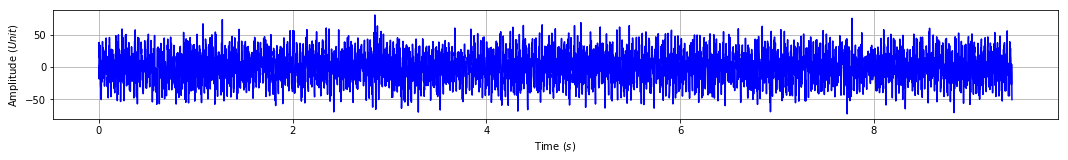

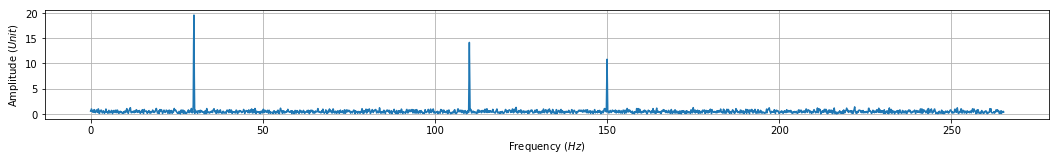

Show me the highest frequency peaks:
   peak     Hz
0  19.6   30.0
1  14.2  110.0
2  13.7   29.9
3  10.8  150.0
4   7.4  109.9


In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Number_samples = 5000 # total points in signal
t = np.linspace(0, 3.0*np.pi, Number_samples, endpoint=True)

peak1_hz = 30 # Hz where the peak occurs
peak1_mag = 20 # magnitude of the peak
peak2_hz = 110 # Hz where the peak occurs
peak2_mag = 15 # magnitude of the peak
peak3_hz = 150 # Hz where the peak occurs
peak3_mag = 10 # magnitude of the peak

# Noise control
noise_mag = 15.0 # magnitude of added noise

# Vibration data generation
s = peak1_mag*np.sin(2*np.pi*peak1_hz*t) + \
    peak2_mag*np.sin(2*np.pi*peak2_hz*t) + \
    peak3_mag*np.sin(2*np.pi*peak3_hz*t) + np.random.normal(0, noise_mag, int(Number_samples)) 

dt = t[1] - t[0]
fa = 1.0/dt # scan frequency
print('dt=%.5fs (Sample Time)' % dt)
print('fa=%.2fHz (Sample Frequency)' % fa)
Nyquist = fa/2
print('Nyquist=%.2fHz (Nyquist freq):' % Nyquist)

#Plotting Time Domain
fig, ax = plt.subplots(figsize=(18,2))
plt.plot(t,s,'b-')
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

Y = np.fft.fft(s)
N = int(Y.size/2+1) #Make it an Integer
#print('Y.size:',Y.size)
X = np.linspace(0, fa/2, N, endpoint=True)

hann = np.hanning(len(s))
Yhann = np.fft.fft(hann*s)

#Plotting Frequency Domain
fig, ax = plt.subplots(figsize=(18,2))
plt.plot(X, 2.0*np.abs(Yhann[:N])/N)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

#Show the highest peak values in the Frequency Domain
print('Show me the highest frequency peaks:')
Peak_values = sorted(zip(2.0*np.abs(Yhann[:N])/N, X), reverse=True)[:5]
df=pd.DataFrame.from_records(Peak_values, columns = ('peak','Hz'))
print(round(df,1))

For example. If we have a ball-bearing 'singing' at a frequency of 30Hz what if the bearing had a fault? 
If so, the magnitude of the peak would be expected to increase.

For monitoring the bearing condition, the maximum “narrowband” ball pass frequency will be trended over time. If the magnitude of the peak deviates significantly from the magnitude under healthy machinery operation (e.g. increasing beyond the 1% confidence interval of the distribution of the peak magnitudes under normal operation), a bearing failure is likely imminent (diagnostics). 

If these vibration measurements are fairly noise-free and trendable over time, the failure of the bearing can be predicted in advance (prognostics) by determining the amount of time until the bearing reaches a predefined fault threshold.